<a href="https://colab.research.google.com/github/AnisaIntania/Desain-dan-Analisis-Algoritma/blob/main/UAS_DAA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**UAS DAA "Penentuan Jalur Pengiriman Barang Tercepat dengan Algoritma Dijkstra "**

Anggota:


*   Anisa Intania Putri
*   Muhammad Azzikra Rabbani



=== HASIL PENENTUAN JALUR TERCEPAT ===
Titik Awal   : Gudang
Titik Tujuan : Tujuan
Jalur        : Gudang -> A2 -> A12 -> A22 -> A23 -> A33 -> A43 -> A53 -> A64 -> A74 -> A85 -> A96 -> Tujuan
Total Jarak  : 24 km

=== ANALISIS ALGORITMA ===
Waktu Komputasi     : 1.168 ms
Kompleksitas Waktu  : O((V + E) log V)
Kompleksitas Ruang  : O(V)


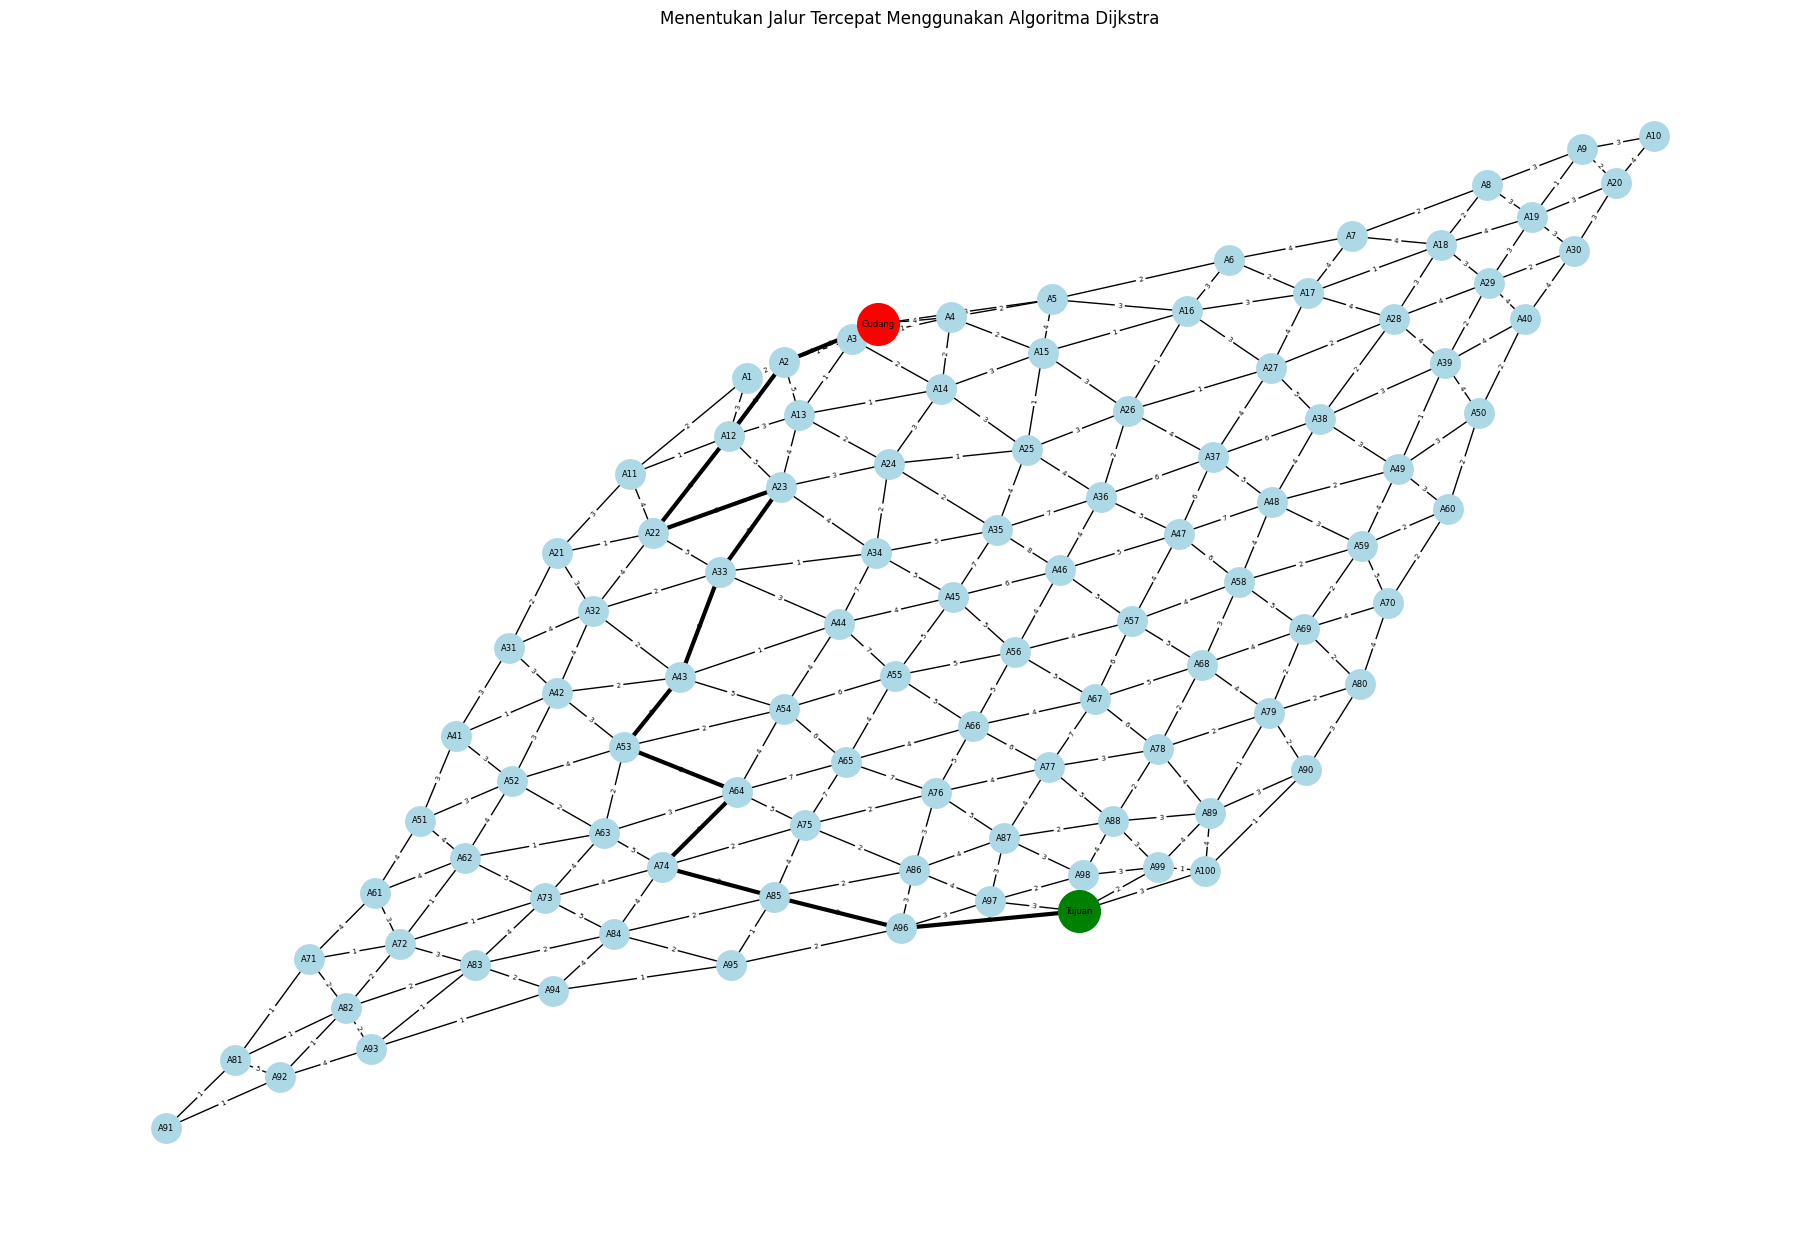

In [ ]:
# Import library
import networkx as nx
import matplotlib.pyplot as plt
import random
import time

# Inisialisasi graf dan variabel
G = nx.Graph()
edges = []
random.seed(42)

# Koneksi awal dari Gudang ke node awal
for i in range(1, 6):
    edges.append(("Gudang", f"A{i}", random.randint(2, 4)))

# Pembentukan graf grid 10x10 dengan bobot dan penalti tengah
for row in range(10):
    for col in range(10):
        node = f"A{row*10 + col + 1}"
        center_penalty = 3 if 3 <= row <= 6 and 3 <= col <= 6 else 0

        if col < 9:
            right = f"A{row*10 + col + 2}"
            edges.append((node, right, random.randint(1, 4) + center_penalty))

        if row < 9:
            down = f"A{(row+1)*10 + col + 1}"
            edges.append((node, down, random.randint(1, 4) + center_penalty))

        if row < 9 and col < 9:
            diag = f"A{(row+1)*10 + col + 2}"
            edges.append((node, diag, random.randint(2, 5) + center_penalty))

# Koneksi node akhir ke Tujuan
edges += [
    ("A96", "Tujuan", random.randint(2, 4)),
    ("A97", "Tujuan", random.randint(2, 4)),
    ("A98", "Tujuan", random.randint(2, 4)),
    ("A99", "Tujuan", random.randint(2, 4)),
    ("A100", "Tujuan", random.randint(2, 4)),
]

# Menambahkan edge ke dalam graf
G.add_weighted_edges_from(edges)

# Penentuan node awal dan tujuan
start_node = "Gudang"
end_node = "Tujuan"

# Proses Algoritma Dijkstra dan pengukuran waktu
start_time = time.perf_counter()
shortest_path = nx.dijkstra_path(G, start_node, end_node)
shortest_distance = nx.dijkstra_path_length(G, start_node, end_node)
end_time = time.perf_counter()
execution_time = (end_time - start_time) * 1000

# Menampilkan hasil perhitungan
print("=== HASIL PENENTUAN JALUR TERCEPAT ===")
print("Titik Awal   :", start_node)
print("Titik Tujuan :", end_node)
print("Jalur        :", " -> ".join(shortest_path))
print("Total Jarak  :", shortest_distance, "km")

print("\n=== ANALISIS ALGORITMA ===")
print("Waktu Komputasi     :", round(execution_time, 4), "ms")
print("Kompleksitas Waktu  : O((V + E) log V)")
print("Kompleksitas Ruang  : O(V)")

# Pengaturan posisi node untuk visualisasi
initial_pos = {}
initial_pos["Gudang"] = (0, 5)

for row in range(10):
    for col in range(10):
        node = f"A{row*10 + col + 1}"
        initial_pos[node] = (col + 1, 10 - row)

initial_pos["Tujuan"] = (11, 5)

pos = nx.spring_layout(
    G,
    pos=initial_pos,
    seed=42,
    k=1.0,
    scale=12,
    iterations=400
)

# Visualisasi graf dan jalur terpendek
plt.figure(figsize=(18, 12))
nx.draw(G, pos, with_labels=True, node_size=450, font_size=6, node_color="lightblue")
nx.draw_networkx_nodes(G, pos, nodelist=["Gudang"], node_color="red", node_size=900)
nx.draw_networkx_nodes(G, pos, nodelist=["Tujuan"], node_color="green", node_size=900)

edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=5)

path_edges = list(zip(shortest_path, shortest_path[1:]))
nx.draw_networkx_edges(G, pos, edgelist=path_edges, width=3)

plt.title("Menentukan Jalur Tercepat Menggunakan Algoritma Dijkstra")
plt.axis("off")
plt.show()
